In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_parquet("s3://group1projectbucket2/cleanparquet/2018.snappy.parquet")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:283: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [3]:
print(df.shape)

(5578618, 61)


In [4]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [5]:
rename_dict = {
    "CRSArrTime": "SchdArrTime",
    "CRSDepTime": "SchdDepTime",
    "CRSElapsedTime": "SchdElapsedTime"
}

# Rename columns
df.rename(columns=rename_dict, inplace=True)

# Show updated DataFrame
print(df)

        FlightDate                      Airline Origin Dest  Cancelled  \
0       2018-01-23            Endeavor Air Inc.    ABY  ATL      False   
1       2018-01-24            Endeavor Air Inc.    ABY  ATL      False   
2       2018-01-25            Endeavor Air Inc.    ABY  ATL      False   
3       2018-01-26            Endeavor Air Inc.    ABY  ATL      False   
4       2018-01-27            Endeavor Air Inc.    ABY  ATL      False   
...            ...                          ...    ...  ...        ...   
5578613 2018-09-11  Air Wisconsin Airlines Corp    SCE  IAD      False   
5578614 2018-09-11  Air Wisconsin Airlines Corp    IAD  GSO      False   
5578615 2018-09-11  Air Wisconsin Airlines Corp    EVV  ORD      False   
5578616 2018-09-11  Air Wisconsin Airlines Corp    ORD  HPN      False   
5578617 2018-09-11  Air Wisconsin Airlines Corp    HPN  ORD      False   

         Diverted  SchdDepTime  DepTime  DepDelayMinutes  DepDelay  ...  \
0           False         1202   115

In [6]:
import pandas as pd
import numpy as np

# Assuming df is your Pandas DataFrame

# Ensure SchdDepTime is a string with 4 digits (left pad with zeros if needed)
df['SchdDepTime'] = df['SchdDepTime'].astype(str).str.zfill(4)

# Extract SchdDepHour (first two digits of SchdDepTime)
df['SchdDepHour'] = df['SchdDepTime'].str[:2].astype(int)

# Categorize into different time periods of the day
df['SchdDepTimeOfDay'] = np.select(
    [
        (df['SchdDepHour'] >= 0) & (df['SchdDepHour'] < 6),
        (df['SchdDepHour'] >= 6) & (df['SchdDepHour'] < 12),
        (df['SchdDepHour'] >= 12) & (df['SchdDepHour'] < 18)
    ],
    ['Night', 'Morning', 'Afternoon'],
    default='Evening'
)

# Categorize DelayCategory based on ArrDelayMinutes
df['DelayCategory'] = np.select(
    [
        df['ArrDelayMinutes'] < 6,
        (df['ArrDelayMinutes'] >= 6) & (df['ArrDelayMinutes'] < 30),
        (df['ArrDelayMinutes'] >= 30) & (df['ArrDelayMinutes'] < 60),
        (df['ArrDelayMinutes'] >= 60) & (df['ArrDelayMinutes'] < 120)
    ],
    ['No Delay', 'Short Delay', 'Medium Delay', 'Long Delay'],
    default='Very Long Delay'
)


In [8]:
df['DelayCategory'].value_counts()


No Delay           4008333
Short Delay         881882
Medium Delay        328297
Long Delay          222237
Very Long Delay     137869
Name: DelayCategory, dtype: int64

In [9]:
df["IsWeekend"] = df["DayOfWeek"].apply(lambda x: 1 if x in [6, 7] else 0)

In [10]:
import pandas as pd

# Load your dataset (assuming df is your DataFrame)
# df = pd.read_csv('your_data.csv')  # Uncomment if reading from a CSV

# Compute correlation with 'ArrDelayMinutes'
correlation_matrix = df.corr()  # Compute correlation matrix
arr_delay_corr = correlation_matrix["ArrDelayMinutes"].sort_values(ascending=False)

# Display top correlated features
print(arr_delay_corr)


/tmp/ipykernel_8453/264630436.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()  # Compute correlation matrix


ArrDelayMinutes                    1.000000
ArrDelay                           0.981818
DepDelayMinutes                    0.975978
DepDelay                           0.971380
ArrivalDelayGroups                 0.833438
DepartureDelayGroups               0.819356
ArrDel15                           0.571491
DepDel15                           0.532299
TaxiOut                            0.180134
DepTime                            0.118045
WheelsOff                          0.112448
SchdDepHour                        0.085783
TaxiIn                             0.083976
SchdArrTime                        0.076569
DOT_ID_Operating_Airline           0.054421
DOT_ID_Marketing_Airline           0.051054
ActualElapsedTime                  0.041487
WheelsOn                           0.028358
ArrTime                            0.021691
Flight_Number_Operating_Airline    0.020776
Flight_Number_Marketing_Airline    0.020736
AirTime                            0.010720
OriginStateFips                 

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a copy of the dataset to avoid modifying the original
df_encoded = df.copy()

# Apply label encoding to categorical features
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert to string to avoid NaN issues

# Compute ANOVA F-statistics between ArrDelayMinutes and encoded categorical variables
f_values, p_values = f_classif(df_encoded[categorical_cols], df_encoded['ArrDelayMinutes'])

# Create DataFrame to display results
anova_results = pd.DataFrame({'Feature': categorical_cols, 'F-Value': f_values, 'P-Value': p_values})
anova_results = anova_results.sort_values(by='F-Value', ascending=False)

# Display categorical feature importance
print(anova_results)


                                    Feature    F-Value        P-Value
19                            DelayCategory        inf   0.000000e+00
16                               DepTimeBlk  97.433504   0.000000e+00
3                               SchdDepTime  96.807321   0.000000e+00
17                               ArrTimeBlk  80.948186   0.000000e+00
18                         SchdDepTimeOfDay  55.537955   0.000000e+00
7                         Operating_Airline   3.623574   0.000000e+00
8               IATA_Code_Operating_Airline   3.623574   0.000000e+00
9                               Tail_Number   3.068524  2.777059e-290
13                             DestCityName   2.837141  7.979747e-244
4                 Marketing_Airline_Network   2.740162  6.226893e-225
6               IATA_Code_Marketing_Airline   2.740162  6.226893e-225
0                                   Airline   2.291558  6.041408e-143
5   Operated_or_Branded_Code_Share_Partners   2.251682  3.689885e-136
2                   

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [14]:
columns_to_remove = [
    # Columns directly related to the target (leakage)
    "ArrDelayMinutes", "ArrDelay", "ArrDel15", "ArrivalDelayGroups", "ArrTimeBlk",
    
    # Columns with unique identifiers or irrelevant information
    "Tail_Number", "Flight_Number_Marketing_Airline", "Flight_Number_Operating_Airline",
    "OriginAirportSeqID", "DestAirportSeqID", "OriginCityMarketID", "DestCityMarketID",
    "OriginStateFips", "DestStateFips", "OriginWac", "DestWac", "DOT_ID_Marketing_Airline",
    "DOT_ID_Operating_Airline","SchdDepTimeOfDay",
    
    # Redundant columns (highly correlated with others)
    "DepDelay", "DepDel15", "DepartureDelayGroups", "DepTimeBlk","DivAirportLandings", "DistanceGroup",
    
    # Columns with duplicate or similar information
    "OriginAirportID", "DestAirportID",  # Use Origin and Dest instead
    "IATA_Code_Marketing_Airline", "IATA_Code_Operating_Airline",  # Use Airline and Operating_Airline instead
    "OriginState", "DestState",  # Use OriginStateName and DestStateName instead
    "Marketing_Airline_Network", "Operated_or_Branded_Code_Share_Partners",  # Use Airline and Operating_Airline instead
    "DepTime", "DepDelayMinutes", "ArrTime", "AirTime",  # Numerical columns
    "Operating_Airline", "OriginCityName", "DestCityName",  # Categorical columns
    "FlightDate","SchdDepTime","SchdElapsedTime","ActualElapsedTime","Distance"
]

In [15]:
df = df.drop(columns=columns_to_remove)

In [16]:
col_to_remove=["Cancelled","Diverted","OriginStateName", "DestStateName"]
df = df.drop(columns=col_to_remove)

In [17]:
df.columns

Index(['Airline', 'Origin', 'Dest', 'Year', 'Quarter', 'Month', 'DayofMonth',
       'DayOfWeek', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'SchdArrTime', 'SchdDepHour', 'DelayCategory', 'IsWeekend'],
      dtype='object')

In [19]:
print(df['Airline'])  # Prints the entire column


0                    Endeavor Air Inc.
1                    Endeavor Air Inc.
2                    Endeavor Air Inc.
3                    Endeavor Air Inc.
4                    Endeavor Air Inc.
                      ...             
5578613    Air Wisconsin Airlines Corp
5578614    Air Wisconsin Airlines Corp
5578615    Air Wisconsin Airlines Corp
5578616    Air Wisconsin Airlines Corp
5578617    Air Wisconsin Airlines Corp
Name: Airline, Length: 5578618, dtype: object


In [20]:
categorical_cols = ['Airline', 'Origin', 'Dest', 'SchdDepTimeOfDay']
numerical_cols = [
    "SchdDepHour", "Year", "Quarter", "Month", "DayofMonth", "DayOfWeek",
    "TaxiOut", "WheelsOff", "WheelsOn", "TaxiIn", "SchdArrTime", "IsWeekend"
]

In [21]:
X = df.drop(columns=["DelayCategory"])

In [22]:
X.columns

Index(['Airline', 'Origin', 'Dest', 'Year', 'Quarter', 'Month', 'DayofMonth',
       'DayOfWeek', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'SchdArrTime', 'SchdDepHour', 'IsWeekend', 'SchdDepTimeOfDay'],
      dtype='object')

In [23]:
y = df["DelayCategory"]  # Target

In [24]:
len(X.columns)

16

In [25]:
import joblib


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),  # Scale numerical features
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),  # One-hot encode categorical features
    ]
)

In [29]:
# Fit on training data
X_train = preprocessor.fit_transform(X_train)

In [32]:
import joblib

# Save the preprocessor as a .joblib file
joblib.dump(preprocessor, "preprocessor.joblib")

print("Preprocessor saved as preprocessor.joblib")


Preprocessor saved as preprocessor.joblib


In [30]:
# Transform test data
X_test = preprocessor.transform(X_test)

In [31]:
# Encode target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [35]:
import joblib

# Save the label encoder as a .joblib file
joblib.dump(label_encoder, "label_encoder.joblib")

print("Label encoder saved as label_encoder.joblib")


Label encoder saved as label_encoder.joblib


In [32]:
# Transform test labels
y_test = label_encoder.transform(y_test)

In [33]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(4462894, 784) (4462894,) (1115724, 784) (1115724,)


In [34]:
label_mapping = {class_label: index for index, class_label in enumerate(label_encoder.classes_)}
label_mapping

{'Long Delay': 0,
 'Medium Delay': 1,
 'No Delay': 2,
 'Short Delay': 3,
 'Very Long Delay': 4}

In [39]:
for index, class_label in enumerate(label_encoder.classes_):
    print(f"Original Label: {class_label} -> Encoded Value: {index}")


Original Label: Long Delay -> Encoded Value: 0
Original Label: Medium Delay -> Encoded Value: 1
Original Label: No Delay -> Encoded Value: 2
Original Label: Short Delay -> Encoded Value: 3
Original Label: Very Long Delay -> Encoded Value: 4


In [35]:
%pip install xgboost pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 145.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [ ]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize the model (no scale_pos_weight for multi-class)
xgb2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model with sample weights
xgb2.fit(X_train, y_train, sample_weight=sample_weights)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:01:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [50]:
# Predict on the test set
y_pred_xgb2 = xgb2.predict(X_test)

# Evaluate accuracy
accuracy_xgb2 = accuracy_score(y_test, y_pred_xgb2)
print(f"XGBoost Accuracy: {accuracy_xgb2:.4f}")
print(classification_report(y_test, y_pred_xgb2))


XGBoost Accuracy: 0.9229
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     44524
           1       0.82      0.90      0.86     65470
           2       0.99      0.93      0.96    801570
           3       0.73      0.89      0.80    176493
           4       0.97      0.97      0.97     27667

    accuracy                           0.92   1115724
   macro avg       0.89      0.92      0.90   1115724
weighted avg       0.93      0.92      0.93   1115724



Confusion Matrix:
[[ 41349   2337     10     53    775]
 [  2580  58966    106   3817      1]
 [    16    437 746164  54937     16]
 [    82  10514   9596 156301      0]
 [   691      6     22      2  26946]]


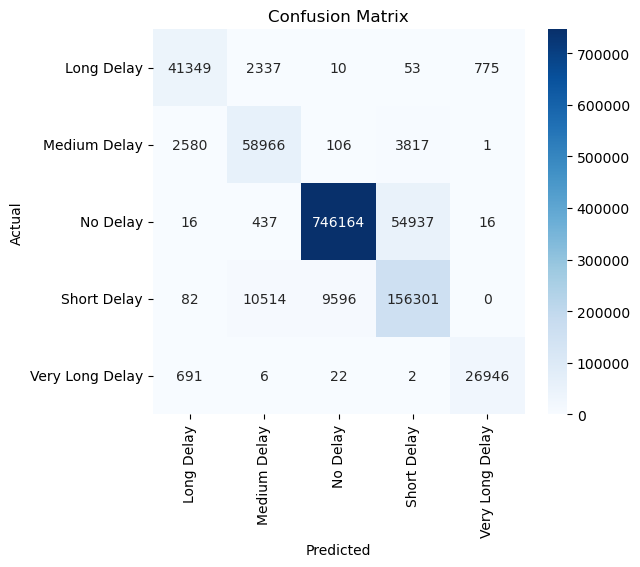

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb2)

# Retrieve class labels from the label encoder
class_labels = label_encoder.classes_  # Gets the original category names

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
import joblib

# Save the trained model as a joblib file
model_filename = "xgboost2_model.joblib"
joblib.dump(xgb2, model_filename)

print(f"Model saved as {model_filename}")


Model saved as xgboost2_model.joblib


In [53]:
from sklearn.metrics import f1_score

# Calculate the F1-score
f1 = f1_score(y_test, y_pred_xgb2, average="weighted")  # Use 'weighted' for multiclass classification

print(f"F1 Score: {f1:.4f}")


F1 Score: 0.9260
